# Gaussian Plume Model for Air Dispersion

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
var_names = {
    "C": "Mean concentration (mg/m^2)",
    "y": "Crosswind distance (m)",
    "z": "Vertical distance (m)",
    "Q": "Pollutant emission rate (mg/s)",
    "sigma_y": "Lateral disperion coefficient (m)", 
    "sigma_z": "Vertical disperion coefficient (m)",
    "U": "Mean wind velocity in downwind direction (m/s)",
    "H": "Effective stack height (m)"
}

In [3]:
params = {
    "Q": 100,
    "sigma_y": 10, 
    "sigma_z": 6,
    "U": 1,
    "H": 10 
}

In [4]:
def calc_concentration_GPM(y, z, params):
    Q = params["Q"]
    sigma_y = params["sigma_y"]
    sigma_z = params["sigma_z"]
    U = params["U"]
    H = params["H"] 
    return Q / (2 * np.pi * U * sigma_y * sigma_z) \
        * np.exp(-y**2 / (2 * sigma_y**2)) * (
            np.exp(-(z - H)**2 / (2 * sigma_z**2)) 
            + np.exp(-(z + H)**2 / (2 * sigma_z**2))
        )

In [5]:
calc_concentration_GPM(0, 10, params)

0.2662837056528183

In [6]:
y_values = np.linspace(-10, 10, 51)
z_values = np.linspace(0, 20, 51)
y_grid, z_grid = np.meshgrid(y_values, z_values)

conc = calc_concentration_GPM(y_grid, z_grid, params)
assert(conc.shape == (y_values.shape[0], z_values.shape[0]))

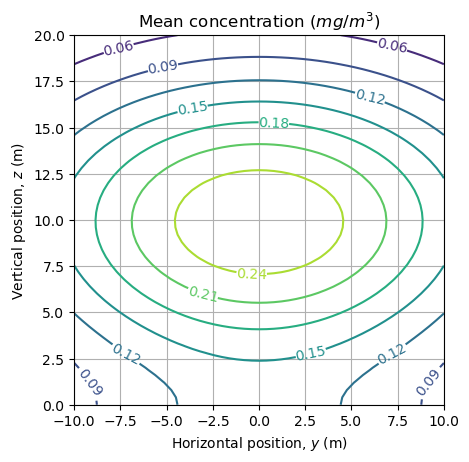

In [7]:
fig, ax = plt.subplots()
p = ax.contour(y_grid, z_grid, conc)
ax.clabel(p)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("Horizontal position, $y$ (m)")
ax.set_ylabel("Vertical position, $z$ (m)")
ax.grid()
ax.set_title("Mean concentration ($mg/m^3$)")
plt.show()